# UJ SN2019 Project 1: MLP
Multiclass classification using MLP (multilayer perceptron) models

## Useful functions for:
- loading data
- saving predictions in format required by _kaggle.com_
- creating not existing directory

In [1]:
import os
import pathlib 
from typing import Sequence
import numpy as np

DATA_DIR = 'data'

def load_data(which: str):
    """
    Loads data from a csv file
    :param which: str
        Which data to load, train or test
    """
    assert which in ['train', 'test']
    
    if which == 'train':
        data = np.loadtxt(fname=os.path.join(DATA_DIR, 'train_data.csv'), delimiter=',', skiprows=1)
        labels = np.loadtxt(fname=os.path.join(DATA_DIR, 'train_labels.csv'), delimiter=',', skiprows=1)
        return data, labels
    elif which == 'test':
        data = np.loadtxt(fname=os.path.join(DATA_DIR, 'test_data.csv'), delimiter=',', skiprows=1)
        return data


def save_prediction(prediction: Sequence[int], 
                    path: str = 'submissions/submission.csv'):
    """
    Saves a sequence of predictions into a csv file with additional index column
    :param prediction: Sequence of ints
        Predictions to save
    :param path: str
        Path to a file to save into
    """
    pred_with_id = np.stack([np.arange(len(prediction)), prediction], axis=1)
    np.savetxt(fname=path, X=pred_with_id, fmt='%d', delimiter=',', header='id,label', comments='')
    
    
def create_not_existing_directory(directory: str):
    """
    Create not existing directory. 
    If directory exists, do nothing.
    :param directory: str
        directory to create
    """
    p = pathlib.Path(directory)
    if not p.is_dir():
        print(f'Creating directory: {directory} as it does not exist')
        p.mkdir(parents=True, exist_ok=True)

## Train data

In [2]:
train_data, train_labels = load_data(which='train')

display(f"Train data shape: {train_data.shape}. \
Dataset contains {train_data.shape[0]} examples and each of them {train_data.shape[1]} features.")
display(f"Train labels shape: {train_labels.shape}. \
As a result of {train_labels.ndim}-dimensional labels, \
I will predict one class from {np.min(train_labels)} to {np.max(train_labels)}.")

'Train data shape: (59580, 342). Dataset contains 59580 examples and each of them 342 features.'

'Train labels shape: (59580,). As a result of 1-dimensional labels, I will predict one class from 0.0 to 9.0.'

#### Check whether data contains 'None' values
- Data does not contain any 'None' value, so I do not have to fill it

In [3]:
display(np.any(np.isnan(train_data)))

False

### Visualization of train data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

n_features = np.arange(train_data.shape[1])

#### Maximum, minimum and median values

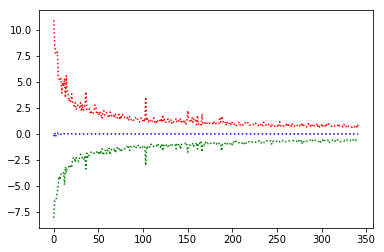

In [5]:
max_features = [np.max(feature) for feature in train_data.T]
min_features = [np.min(feature) for feature in train_data.T]
median_features = [np.median(feature) for feature in train_data.T]

plt.plot(n_features, max_features, 'r:', label='max')
plt.plot(n_features, min_features, 'g:', label='min')
plt.plot(n_features, median_features, 'b:', label='median')
plt.show()

It looks like each feature has median near 0, max and min value with a similar absoulute value away from median. <br>

#### Standard deviation

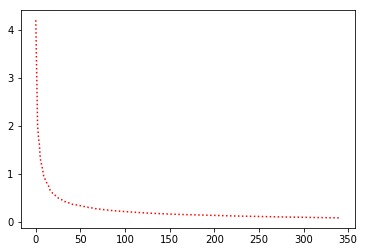

In [6]:
std_features = [np.std(feature) for feature in train_data.T]
plt.plot(n_features, std_features, 'r:')

#### Mean 

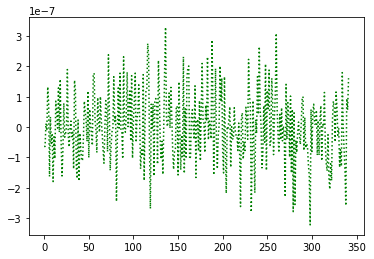

In [7]:
mean_features = [np.mean(feature) for feature in train_data.T]
plt.plot(n_features, mean_features, 'g:')

#### Visualize how similar is feature distribution to gaussian distribution

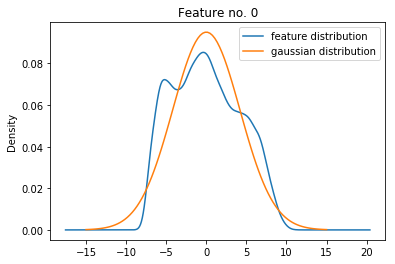

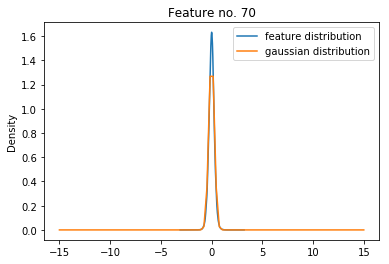

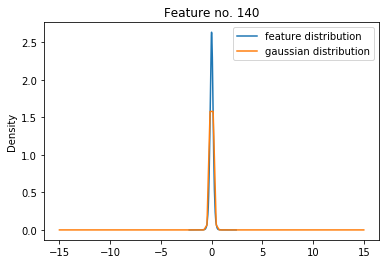

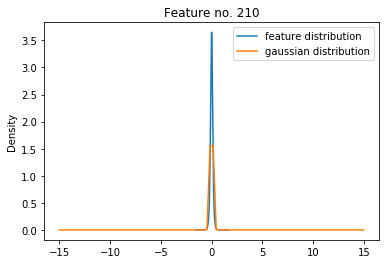

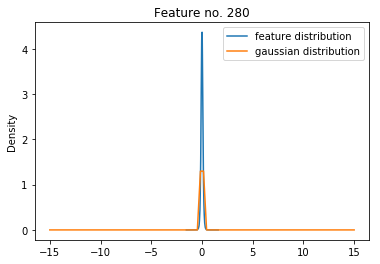

In [8]:
from scipy.stats import norm
import pandas as pd

def plot_distributions(feature_to_plot: int):
    """
    Plot feature distribution and gaussian distribution with mean and std taken from feature data
    :param feature_to_plot: int
        number of feature to plot
    """
    x_to_gaussian_distribution = np.linspace(-15, 15, 100)
    pd.DataFrame(train_data.T[feature_to_plot]).plot(kind='density')

    plt.plot(
        x_to_gaussian_distribution, 
        norm.pdf(
            x_to_gaussian_distribution,
            mean_features[feature_to_plot],
            std_features[feature_to_plot]
        )
    )
    plt.title(f'Feature no. {feature_to_plot}')
    plt.legend(['feature distribution', 'gaussian distribution'], loc='upper right')
    
for f_num in range(0, train_data.shape[1], 70):
    plot_distributions(feature_to_plot=f_num)

#### As a result of above visualizations (prior is similar to normal distribution), L2 regularization can be helpful.

## MLP Model

In [9]:
import torch
import torch.nn as nn

def create_first_model() -> torch.nn.Sequential:
    """
    Create MLP model
    :return: newly created model
    """
    return nn.Sequential(
        nn.Linear(in_features=342, out_features=200),
        nn.ReLU(),
        nn.Linear(in_features=200, out_features=100),
        nn.ReLU(),
        nn.Linear(in_features=100, out_features=10)
    )

def create_second_model() -> torch.nn.Sequential:
    """
    Create MLP model
    :return: newly created model
    """
    return nn.Sequential(
        nn.Linear(in_features=342, out_features=450),
        nn.ELU(),
        nn.BatchNorm1d(450),
        nn.Linear(in_features=450, out_features=300),
        nn.ReLU(),
        nn.BatchNorm1d(300),
        nn.Linear(in_features=300, out_features=150),
        nn.ELU(),
        nn.BatchNorm1d(150),
        nn.Linear(in_features=150, out_features=10)
    )

def create_third_model() -> torch.nn.Sequential:
    """
    Create MLP model
    :return: newly created model
    """
    return nn.Sequential(
        nn.Linear(in_features=342, out_features=270),
        nn.PReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=270, out_features=170),
        nn.ReLU(),
        nn.Linear(in_features=170, out_features=10)
    )

def create_fourth_model() -> torch.nn.Sequential:
    """
    Create MLP model
    :return: newly created model
    """
    return nn.Sequential(
        nn.Linear(in_features=342, out_features=200),
        nn.PReLU(),
        nn.Dropout(p=0.25),
        nn.Linear(in_features=200, out_features=10)
    )

def create_fifth_model() -> torch.nn.Sequential:
    """
    Create MLP model
    :return: newly created model
    """
    return nn.Sequential(
        nn.Linear(in_features=342, out_features=200),
        nn.SELU(),
        nn.Linear(in_features=200, out_features=100),
        nn.SELU(),
        nn.Linear(in_features=100, out_features=10)
    )


def create_sixth_model() -> torch.nn.Sequential:
    """
    Create MLP model
    :return: newly created model
    """
    return nn.Sequential(
        nn.Linear(in_features=342, out_features=200),
        nn.ReLU(),
        nn.BatchNorm1d(200),
        nn.Linear(in_features=200, out_features=100),
        nn.SELU(),
        nn.BatchNorm1d(100),
        nn.Linear(in_features=100, out_features=10)
    )


def create_seventh_model() -> torch.nn.Sequential:
    """
    Create MLP model
    :return: newly created model
    """
    return nn.Sequential(
        nn.Linear(in_features=342, out_features=400),
        nn.ReLU(),
        nn.BatchNorm1d(400),
        nn.Linear(in_features=400, out_features=250),
        nn.ELU(),
        nn.BatchNorm1d(250),
        nn.Linear(in_features=250, out_features=100),
        nn.ReLU(),
        nn.BatchNorm1d(100),
        nn.Linear(in_features=100, out_features=10)
    )


## Train and test data

- training and validation

In [10]:
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split

def get_train_and_validation_datasets() -> Sequence[torch.utils.data.TensorDataset]:
    """
    Split train dataset for training and validation for better learning tracking.
    Train- 90%
    Validation- 10%
    """
    train_data, train_labels = load_data(which='train')
    train_X, validation_X, train_y, validation_y = train_test_split(
        train_data, 
        train_labels, 
        test_size=0.1, 
        random_state=0
    )

    X_train: torch.Tensor = torch.from_numpy(train_X).float()
    X_validation: torch.Tensor = torch.from_numpy(validation_X).float()
    y_train: torch.Tensor = torch.from_numpy(train_y).long()
    y_validation: torch.Tensor = torch.from_numpy(validation_y).long()
        
    train_dataset = TensorDataset(X_train, y_train)
    validation_dataset = TensorDataset(X_validation, y_validation)
    
    return train_dataset, validation_dataset

- test

In [12]:
from torch.utils.data import DataLoader

def get_test_dataloader() -> torch.utils.data.DataLoader:
    """
    Returns dataset for prediction.
    :return: testing dataset
    """
    test_data = load_data(which='test')   
    X_test: torch.Tensor = torch.from_numpy(test_data).float()
    test_dataset = TensorDataset(X_test)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
    return test_dataloader

## Training with validation

- If model obtain better accuracy on validation dataset than in previous epochs, model is saved.
- __Early stopping__: If there is no accuracy improvements in 7 following epochs, training is stopped.

In [13]:
N_EPOCHS_WITHOUT_IMPROVEMENT: int = 7

In [14]:
from torch.nn.functional import cross_entropy
import torch.optim as optim

def train_with_validation(train_dataset: torch.utils.data.TensorDataset, 
                          validation_dataset: torch.utils.data.TensorDataset, 
                          model: torch.nn.Sequential,
                          model_num: int) -> int:
    """
    Train model with training data splitted to train
    and validation datasets for better learning tracking.
    :param train_dataset: torch.utils.data.TensorDataset
        dataset prepared for training
    :param validation_dataset: torch.utils.data.TensorDataset
        dataset prepared for validation
    :param model: torch.nn.Sequential
        model to train
    :param model_num: int
        number of model to train
    :return: number of epochs which are used for training (greater than N_EPOCHS_WITHOUT_IMPROVEMENT parameter)
    """
    
    print('STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET')
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)
    optimizer: torch.optim.Optimizer = optim.Adam(model.parameters(), amsgrad=True, lr=0.0007, weight_decay=0.001)

    epoch: int = 100
    best_accuracy_on_validation: int = 0
    epochs_without_improvement: int = 0
    overall_epochs: int = 0

    for e in range(epoch):
        overall_epochs += 1
        correct_train: int = 0 
        loss_train : int = 0
        for i, (x, y) in enumerate(train_dataloader):
            optimizer.zero_grad()
            output: torch.Tensor = model(x)
            loss: torch.Tensor = cross_entropy(output, y)
            loss.backward()
            optimizer.step()
            correct_train += float(sum(output.argmax(dim=1) == y))
            loss_train += loss.item()

        with torch.no_grad():
            correct_validation: int = 0 
            for i, (x, y) in enumerate(validation_dataloader):
                output: torch.Tensor = model(x)
                correct_validation += float(sum(output.argmax(dim=1) == y))

            print(f"Validation accuracy: {correct_validation / len(validation_dataset)}")

        print(f"Train accuracy: {correct_train / len(train_dataset)}")

        validation_accuracy = correct_validation / len(validation_dataset)
        if validation_accuracy > best_accuracy_on_validation:
            best_accuracy_on_validation = validation_accuracy
            create_not_existing_directory('model/')
            torch.save(model.state_dict(), os.path.join('model', 'model_' + str(model_num) + str(SEED) + '.pt'))
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement == N_EPOCHS_WITHOUT_IMPROVEMENT:
            break

        print(f"Epoch {e} loss: {loss_train / len(train_dataset)}")

    print(f'Best accuracy that has been obtained on validation dataset: {best_accuracy_on_validation}')
    return overall_epochs

## Prediction on test data
- Predictions will be saved to file with model number and seed value in name and then uses for model ensemble.

In [16]:
def save_predictions_with_directory_check(seed: int, predictions: torch.Tensor, model_num: int):
    """
    Check wheter directory for results exists, if not-create.
    Save predictions in above directory.
    :param seed: int 
        seed value used for torch.manual_seed and np.random.seed; useful for saving filename with it
    :prediction: torch.Tensor
        predictions to save
    :param model_num: int
        number of model used for predicting test labels
    """
    predictions_dir = 'submissions/'
    print(f'SAVING PREDICTIONS FOR SEED VALUE: {seed} IN {predictions_dir}')
    create_not_existing_directory(
        directory=predictions_dir
    )
    save_prediction(
        prediction=predictions, 
        path=predictions_dir + 'submission_' + str(model_num) + str(seed) + '.csv'
    )

def predict_and_save(test_dataloader, seed: int, model, model_num: int):
    """
    Predict class for test data
    :param test_dataloader: 
        test examples loader
    :param seed: int 
        seed value used for torch.manual_seed and np.random.seed; used only for saving filename with predictions
    :model: torch.nn.Sequential
        model used for predicting labels for training examples
    :param model_num: int
        number of model used for predicting test labels
    """
    print('STARTING TEST CLASSES PREDICTION')
    output_test = []
    with torch.no_grad():
        correct: int = 0 
        for _, x in enumerate(test_dataloader):
            output: torch.Tensor = model(x[0])
            output_test.append(output.argmax(dim=1))

    output_test = torch.cat((output_test), 0)
    save_predictions_with_directory_check(seed=seed, predictions=output_test, model_num=model_num)
    

## Main baseline:
- Predictions gathering for different models (7) and seed values (from 0 to 20)
    - training with validation
    - test classes prediction

In [17]:
batch_size: int = 64
seeds = np.arange(21)
  
models = [create_first_model, 
          create_second_model, 
          create_third_model, 
          create_fourth_model, 
          create_fifth_model, 
          create_sixth_model,
          create_seventh_model]


for m_num, m in enumerate(models):
    for SEED in seeds:
        print(f'STARTING TRAINING WITH SEED SET TO: {SEED} AND MODEL: {m_num}')
        torch.manual_seed(SEED)
        np.random.seed(SEED)

        train_dataset, validation_dataset = get_train_and_validation_datasets()
        model = m()
        overall_epochs = train_with_validation(
            train_dataset=train_dataset, 
            validation_dataset=validation_dataset,
            model=model,
            model_num=m_num
        )

        test_dataloader = get_test_dataloader()
        predict_and_save(
            test_dataloader=test_dataloader,
            seed=SEED,
            model=model,
            model_num=m_num
        )
    

STARTING TRAINING WITH SEED SET TO: 0 AND MODEL: 0
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.7992614971466935
Train accuracy: 0.7479952258401402
Creating directory: model/ as it does not exist
Epoch 0 loss: 0.01116335341255088
Validation accuracy: 0.8227593152064451
Train accuracy: 0.814423184513819
Epoch 1 loss: 0.007807721197994183
Validation accuracy: 0.8338368580060423
Train accuracy: 0.8335571220767596
Epoch 2 loss: 0.007038285721731596
Validation accuracy: 0.8413897280966768
Train accuracy: 0.8448211554958786
Epoch 3 loss: 0.006543490022364193
Validation accuracy: 0.8435716683450822
Train accuracy: 0.8557122076759539
Epoch 4 loss: 0.0061447831598617966
Validation accuracy: 0.8492782813024505
Train accuracy: 0.8643094252359106
Epoch 5 loss: 0.0058553550414759655
Validation accuracy: 0.850453172205438
Train accuracy: 0.8674611167058297
Epoch 6 loss: 0.0056253283905243106
Validation accuracy: 0.8516280631084256
Train accuracy: 0.8741561299

Validation accuracy: 0.8541456864719704
Train accuracy: 0.8914997575621946
Epoch 11 loss: 0.004685325619262787
Validation accuracy: 0.8551527358173884
Train accuracy: 0.8952109208906792
Epoch 12 loss: 0.004546096857802096
Validation accuracy: 0.8595166163141994
Train accuracy: 0.8990153295289247
Epoch 13 loss: 0.004444819719337402
Validation accuracy: 0.855320577374958
Train accuracy: 0.8999664316884861
Epoch 14 loss: 0.004346484154488381
Validation accuracy: 0.8543135280295401
Train accuracy: 0.903602998769162
Epoch 15 loss: 0.004249601356288053
Validation accuracy: 0.8559919436052367
Train accuracy: 0.9059714296370892
Epoch 16 loss: 0.00415411763851096
Validation accuracy: 0.8564954682779456
Train accuracy: 0.9083398605050166
Epoch 17 loss: 0.004065990961126877
Validation accuracy: 0.8517959046659953
Train accuracy: 0.9088433851777256
Epoch 18 loss: 0.003995788683429461
Validation accuracy: 0.851460221550856
Train accuracy: 0.910708291372944
Epoch 19 loss: 0.00391349639172636
Validat

Validation accuracy: 0.8586774085263511
Train accuracy: 0.8958636380590056
Epoch 13 loss: 0.004500590272578205
Validation accuracy: 0.8522994293387043
Train accuracy: 0.8995188542016337
Epoch 14 loss: 0.00434431559924317
Validation accuracy: 0.8534743202416919
Train accuracy: 0.9028010891052181
Epoch 15 loss: 0.004270064304201193
Validation accuracy: 0.860691507217187
Train accuracy: 0.905542501212189
Epoch 16 loss: 0.004195916120542754
Validation accuracy: 0.8590130916414904
Train accuracy: 0.9069411808586028
Epoch 17 loss: 0.004071402387482118
Validation accuracy: 0.8578382007385028
Train accuracy: 0.9089366304874865
Epoch 18 loss: 0.003994800818587384
Validation accuracy: 0.856831151393085
Train accuracy: 0.9118085860281228
Epoch 19 loss: 0.003938145562047671
Validation accuracy: 0.8521315877811346
Train accuracy: 0.912237514453023
Epoch 20 loss: 0.003831650654104741
Validation accuracy: 0.8549848942598187
Train accuracy: 0.9143635075155719
Epoch 21 loss: 0.0037716783660696274
Valid

STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 8 IN submissions/
STARTING TRAINING WITH SEED SET TO: 9 AND MODEL: 0
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.7987579724739846
Train accuracy: 0.7470068255566745
Epoch 0 loss: 0.01113999530243405
Validation accuracy: 0.8192346424974823
Train accuracy: 0.8132296445488791
Epoch 1 loss: 0.007816137110227474
Validation accuracy: 0.8294729775092313
Train accuracy: 0.8343403826787512
Epoch 2 loss: 0.007010641470254145
Validation accuracy: 0.8402148371936892
Train accuracy: 0.846387676699862
Epoch 3 loss: 0.006488148536669146
Validation accuracy: 0.8397113125209802
Train accuracy: 0.8569243967028458
Epoch 4 loss: 0.006113747827660646
Validation accuracy: 0.8408862034239678
Train accuracy: 0.8654283689530416
Epoch 5 loss: 0.005810730815387298
Validation accuracy: 0.846592816381336
Train accuracy: 0.8690462869717653
Epoch 6 loss: 0.005572949206876647
Validation accuracy: 0.8524672708

Validation accuracy: 0.8533064786841222
Train accuracy: 0.8792846219835142
Epoch 8 loss: 0.005192643583025422
Validation accuracy: 0.8539778449144008
Train accuracy: 0.8831263287456641
Epoch 9 loss: 0.005047635246601932
Validation accuracy: 0.8554884189325277
Train accuracy: 0.8877139979859013
Epoch 10 loss: 0.00488431575502416
Validation accuracy: 0.8512923799932863
Train accuracy: 0.8901756741635896
Epoch 11 loss: 0.004744034293719573
Validation accuracy: 0.8580060422960725
Train accuracy: 0.8931781731378912
Epoch 12 loss: 0.004641905385850948
Validation accuracy: 0.8522994293387043
Train accuracy: 0.8961433739882884
Epoch 13 loss: 0.004517335954205022
Validation accuracy: 0.8541456864719704
Train accuracy: 0.8996493976352989
Epoch 14 loss: 0.004417716179206038
Validation accuracy: 0.856831151393085
Train accuracy: 0.9014210585207564
Epoch 15 loss: 0.004302274845928183
Validation accuracy: 0.8575025176233635
Train accuracy: 0.9030248778486442
Epoch 16 loss: 0.0042160002083361054
Vali

Validation accuracy: 0.823262839879154
Train accuracy: 0.8130431539293573
Epoch 1 loss: 0.007839932333577828
Validation accuracy: 0.8338368580060423
Train accuracy: 0.834918503599269
Epoch 2 loss: 0.007062534770503252
Validation accuracy: 0.8415575696542464
Train accuracy: 0.8452314348588266
Epoch 3 loss: 0.006554282838766651
Validation accuracy: 0.8429003021148036
Train accuracy: 0.8551900339412928
Epoch 4 loss: 0.006167616158415926
Validation accuracy: 0.8423967774420946
Train accuracy: 0.8610085412703741
Epoch 5 loss: 0.005891393834961857
Validation accuracy: 0.8561597851628063
Train accuracy: 0.8684308679273433
Epoch 6 loss: 0.005631414251571883
Validation accuracy: 0.8516280631084256
Train accuracy: 0.8742680243183768
Epoch 7 loss: 0.005398262001748834
Validation accuracy: 0.8464249748237663
Train accuracy: 0.8790421841781358
Epoch 8 loss: 0.005211911504468996
Validation accuracy: 0.8576703591809332
Train accuracy: 0.8839468874715601
Epoch 9 loss: 0.0050367870550812625
Validation 

Validation accuracy: 0.8576703591809332
Train accuracy: 0.9229234269516243
Epoch 27 loss: 0.0034758015609239724
Validation accuracy: 0.8600201409869084
Train accuracy: 0.9243780537838947
Best accuracy that has been obtained on validation dataset: 0.8608593487747567
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 18 IN submissions/
STARTING TRAINING WITH SEED SET TO: 19 AND MODEL: 0
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.798590130916415
Train accuracy: 0.7492633620528888
Epoch 0 loss: 0.011083367775832076
Validation accuracy: 0.8227593152064451
Train accuracy: 0.8130804520532617
Epoch 1 loss: 0.00781405351622236
Validation accuracy: 0.8365223229271568
Train accuracy: 0.8354033792100257
Epoch 2 loss: 0.006983273488005932
Validation accuracy: 0.8348439073514602
Train accuracy: 0.8465182201335273
Epoch 3 loss: 0.006474168005295439
Validation accuracy: 0.8442430345753609
Train accuracy: 0.8564395210920891
Epoch 4 loss: 0.006

Validation accuracy: 0.8383685800604229
Train accuracy: 0.8690089888478609
Epoch 10 loss: 0.005465195499707093
Validation accuracy: 0.8415575696542464
Train accuracy: 0.8719182425124016
Epoch 11 loss: 0.005335687747599139
Validation accuracy: 0.8412218865391071
Train accuracy: 0.8741001827608071
Epoch 12 loss: 0.005225468424441791
Validation accuracy: 0.8452500839207788
Train accuracy: 0.8790048860542314
Epoch 13 loss: 0.005133995201136735
Validation accuracy: 0.8420610943269553
Train accuracy: 0.880683301629928
Epoch 14 loss: 0.004991754367744717
Validation accuracy: 0.8402148371936892
Train accuracy: 0.8820260340904853
Epoch 15 loss: 0.004934292610657308
Validation accuracy: 0.8382007385028533
Train accuracy: 0.8844690612062214
Epoch 16 loss: 0.004835977172602348
Validation accuracy: 0.8450822423632092
Train accuracy: 0.885345567117974
Epoch 17 loss: 0.004736603500470805
Validation accuracy: 0.8484390735146022
Train accuracy: 0.8895229569952632
Epoch 18 loss: 0.004631775770051411
Val

Validation accuracy: 0.8425646189996643
Train accuracy: 0.8637313043153929
Epoch 8 loss: 0.005705266227757205
Validation accuracy: 0.8429003021148036
Train accuracy: 0.8681697810600126
Epoch 9 loss: 0.005519006446180098
Validation accuracy: 0.8368580060422961
Train accuracy: 0.8710790347245534
Epoch 10 loss: 0.005402894214950028
Validation accuracy: 0.8429003021148036
Train accuracy: 0.8716571556450711
Epoch 11 loss: 0.005325775383015507
Validation accuracy: 0.8415575696542464
Train accuracy: 0.8751445302301294
Epoch 12 loss: 0.005214663105508792
Validation accuracy: 0.8417254112118161
Train accuracy: 0.879769497594271
Epoch 13 loss: 0.005082665451677158
Validation accuracy: 0.8382007385028533
Train accuracy: 0.880776546939689
Epoch 14 loss: 0.004989842192810815
Validation accuracy: 0.8459214501510574
Train accuracy: 0.8825295587631942
Epoch 15 loss: 0.00488902305371545
Validation accuracy: 0.8434038267875126
Train accuracy: 0.8843571668345083
Epoch 16 loss: 0.004856494055038057
Valida

Validation accuracy: 0.8402148371936892
Train accuracy: 0.8837417477900862
Epoch 16 loss: 0.0048522899018827136
Validation accuracy: 0.8442430345753609
Train accuracy: 0.8862780202155831
Epoch 17 loss: 0.0047236528585373385
Validation accuracy: 0.8387042631755622
Train accuracy: 0.8888329417030323
Best accuracy that has been obtained on validation dataset: 0.8455857670359181
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 6 IN submissions/
STARTING TRAINING WITH SEED SET TO: 7 AND MODEL: 1
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.8173883853642162
Train accuracy: 0.7748685241132371
Epoch 0 loss: 0.009699677178062137
Validation accuracy: 0.8224236320913058
Train accuracy: 0.8196262727984782
Epoch 1 loss: 0.007598020233896684
Validation accuracy: 0.828633769721383
Train accuracy: 0.8321957405542502
Epoch 2 loss: 0.007070752214564653
Validation accuracy: 0.8324941255454851
Train accuracy: 0.8405318712468762
Epoch 3 loss: 0.00

Validation accuracy: 0.8313192346424975
Train accuracy: 0.8465182201335273
Epoch 4 loss: 0.006449758370959689
Validation accuracy: 0.8351795904665995
Train accuracy: 0.8514229234269516
Epoch 5 loss: 0.006228911589226281
Validation accuracy: 0.8331654917757637
Train accuracy: 0.8568684495169893
Epoch 6 loss: 0.00603667514286217
Validation accuracy: 0.8385364216179926
Train accuracy: 0.8608779978367088
Epoch 7 loss: 0.00587202244212478
Validation accuracy: 0.8393756294058409
Train accuracy: 0.8610831375181829
Epoch 8 loss: 0.005720225059462787
Validation accuracy: 0.8455857670359181
Train accuracy: 0.8663421729886986
Epoch 9 loss: 0.005602976474216937
Validation accuracy: 0.8413897280966768
Train accuracy: 0.8698295475737571
Epoch 10 loss: 0.005458998042795678
Validation accuracy: 0.8447465592480699
Train accuracy: 0.8717690500167842
Epoch 11 loss: 0.005358114037991353
Validation accuracy: 0.8397113125209802
Train accuracy: 0.8742307261944724
Epoch 12 loss: 0.005216183397994109
Validatio

Validation accuracy: 0.8427324605572339
Train accuracy: 0.8766737533102085
Epoch 13 loss: 0.005153664774901784
Validation accuracy: 0.8427324605572339
Train accuracy: 0.8776808026556264
Epoch 14 loss: 0.005048418051657791
Validation accuracy: 0.8412218865391071
Train accuracy: 0.8813546678602067
Epoch 15 loss: 0.004929912430831201
Validation accuracy: 0.8410540449815375
Train accuracy: 0.8842079743388908
Epoch 16 loss: 0.004812349558553534
Validation accuracy: 0.8361866398120175
Train accuracy: 0.8858490917906829
Epoch 17 loss: 0.004772394752160967
Validation accuracy: 0.846592816381336
Train accuracy: 0.8885718548357018
Epoch 18 loss: 0.00466188138992707
Validation accuracy: 0.8402148371936892
Train accuracy: 0.8895043079333109
Epoch 19 loss: 0.0046327063488462725
Validation accuracy: 0.8390399462907016
Train accuracy: 0.8912386706948641
Epoch 20 loss: 0.004517947668797762
Validation accuracy: 0.8439073514602216
Train accuracy: 0.8928238409607997
Epoch 21 loss: 0.004460781938275337
Va

Validation accuracy: 0.8437395099026519
Train accuracy: 0.8874342620566186
Epoch 18 loss: 0.004679679420975115
Validation accuracy: 0.8407183618663981
Train accuracy: 0.8901383760396852
Best accuracy that has been obtained on validation dataset: 0.847096341054045
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 16 IN submissions/
STARTING TRAINING WITH SEED SET TO: 17 AND MODEL: 1
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.8180597515944948
Train accuracy: 0.7729663197941143
Epoch 0 loss: 0.009801624461389886
Validation accuracy: 0.8187311178247734
Train accuracy: 0.8187124687628212
Epoch 1 loss: 0.007658327177663255
Validation accuracy: 0.8340046995636119
Train accuracy: 0.8316362686956846
Epoch 2 loss: 0.007090850944801115
Validation accuracy: 0.8333333333333334
Train accuracy: 0.8401588900078326
Epoch 3 loss: 0.006736807187518325
Validation accuracy: 0.8328298086606244
Train accuracy: 0.8450262951773526
Epoch 4 loss: 0.006

Validation accuracy: 0.8413897280966768
Train accuracy: 0.8736712543359069
Epoch 11 loss: 0.0053084134597852755
Validation accuracy: 0.8430681436723733
Train accuracy: 0.8759837380179777
Epoch 12 loss: 0.005194936864563523
Validation accuracy: 0.8413897280966768
Train accuracy: 0.878147029204431
Epoch 13 loss: 0.005080830489084964
Validation accuracy: 0.8395434709634105
Train accuracy: 0.8810749319309239
Epoch 14 loss: 0.004954652042019386
Validation accuracy: 0.8387042631755622
Train accuracy: 0.8830703815598075
Epoch 15 loss: 0.0049025130619944415
Validation accuracy: 0.8420610943269553
Train accuracy: 0.8857744955428742
Epoch 16 loss: 0.004799432480497747
Validation accuracy: 0.8392077878482712
Train accuracy: 0.8874902092424751
Best accuracy that has been obtained on validation dataset: 0.8449144008056395
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 20 IN submissions/
STARTING TRAINING WITH SEED SET TO: 0 AND MODEL: 2
STARTING TRAINING WITH CHECKING ACCURACY 

Validation accuracy: 0.8507888553205774
Train accuracy: 0.898642348289881
Best accuracy that has been obtained on validation dataset: 0.855320577374958
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 2 IN submissions/
STARTING TRAINING WITH SEED SET TO: 3 AND MODEL: 2
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.7895266868076536
Train accuracy: 0.7475289992913356
Epoch 0 loss: 0.010972126594193944
Validation accuracy: 0.8173883853642162
Train accuracy: 0.8064413859982843
Epoch 1 loss: 0.008139606009312742
Validation accuracy: 0.8301443437395098
Train accuracy: 0.8296594681287531
Epoch 2 loss: 0.007137225143341042
Validation accuracy: 0.8388721047331319
Train accuracy: 0.8470030957442841
Epoch 3 loss: 0.006517273401725848
Validation accuracy: 0.8434038267875126
Train accuracy: 0.8570549401365112
Epoch 4 loss: 0.006066074734843745
Validation accuracy: 0.8445787176905002
Train accuracy: 0.8638059005632017
Epoch 5 loss: 0.0057902

Validation accuracy: 0.8516280631084256
Train accuracy: 0.8866510014546268
Epoch 11 loss: 0.004843019597633341
Validation accuracy: 0.8457536085934877
Train accuracy: 0.8898213419864981
Epoch 12 loss: 0.004777653480796838
Validation accuracy: 0.8497818059751594
Train accuracy: 0.8913132669426728
Epoch 13 loss: 0.004690684394959632
Validation accuracy: 0.8420610943269553
Train accuracy: 0.8922643691022342
Epoch 14 loss: 0.004601355490628798
Validation accuracy: 0.8489425981873112
Train accuracy: 0.894987132147253
Epoch 15 loss: 0.004521188913540894
Validation accuracy: 0.8432359852299429
Train accuracy: 0.8954720077580097
Epoch 16 loss: 0.004455517106699412
Validation accuracy: 0.8440751930177912
Train accuracy: 0.8986796464137854
Epoch 17 loss: 0.00435933180758898
Validation accuracy: 0.8425646189996643
Train accuracy: 0.897318264891276
Best accuracy that has been obtained on validation dataset: 0.8516280631084256
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 6 IN

STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.792715676401477
Train accuracy: 0.742586997874007
Epoch 0 loss: 0.011011756417187612
Validation accuracy: 0.8121852970795569
Train accuracy: 0.8042594457498787
Epoch 1 loss: 0.008190836542193615
Validation accuracy: 0.8328298086606244
Train accuracy: 0.828727015031144
Epoch 2 loss: 0.007224066007551247
Validation accuracy: 0.8400469956361195
Train accuracy: 0.8440005967699825
Epoch 3 loss: 0.00658401132701498
Validation accuracy: 0.8430681436723733
Train accuracy: 0.8547424564544404
Epoch 4 loss: 0.006154760288723561
Validation accuracy: 0.8454179254783485
Train accuracy: 0.862929394651449
Epoch 5 loss: 0.005850626744519174
Validation accuracy: 0.8452500839207788
Train accuracy: 0.8684681660512477
Epoch 6 loss: 0.005619395594153391
Validation accuracy: 0.8452500839207788
Train accuracy: 0.8724777143709671
Epoch 7 loss: 0.00539624726135156
Validation accuracy: 0.8469284994964753
Train accuracy: 0.87669

Validation accuracy: 0.8370258475998658
Train accuracy: 0.8444108761329305
Epoch 3 loss: 0.006621186896079843
Validation accuracy: 0.8439073514602216
Train accuracy: 0.8542762299056358
Epoch 4 loss: 0.006162233468108867
Validation accuracy: 0.8432359852299429
Train accuracy: 0.8621274849875051
Epoch 5 loss: 0.005818550087316181
Validation accuracy: 0.8398791540785498
Train accuracy: 0.8691395322815263
Epoch 6 loss: 0.005620577360279082
Validation accuracy: 0.8450822423632092
Train accuracy: 0.8742680243183768
Epoch 7 loss: 0.005383923904337596
Validation accuracy: 0.8497818059751594
Train accuracy: 0.8773637686024393
Epoch 8 loss: 0.005201785669121453
Validation accuracy: 0.8439073514602216
Train accuracy: 0.8797321994703666
Epoch 9 loss: 0.005069571358486351
Validation accuracy: 0.8506210137630077
Train accuracy: 0.8864458617731528
Epoch 10 loss: 0.004906621389556485
Validation accuracy: 0.8506210137630077
Train accuracy: 0.8879377867293275
Epoch 11 loss: 0.004856875692278326
Validati

Validation accuracy: 0.8475998657267539
Train accuracy: 0.8730558352914848
Epoch 7 loss: 0.0054256333294080555
Validation accuracy: 0.8455857670359181
Train accuracy: 0.8762075267614039
Epoch 8 loss: 0.005263711560191999
Validation accuracy: 0.8454179254783485
Train accuracy: 0.8803849166386931
Epoch 9 loss: 0.005124576417856742
Validation accuracy: 0.8403826787512588
Train accuracy: 0.8838909402857036
Epoch 10 loss: 0.004977982853626859
Validation accuracy: 0.8444108761329305
Train accuracy: 0.885755846480922
Epoch 11 loss: 0.004886478390460591
Validation accuracy: 0.8450822423632092
Train accuracy: 0.8886651001454627
Epoch 12 loss: 0.0047772861293244265
Validation accuracy: 0.8447465592480699
Train accuracy: 0.889802692924546
Epoch 13 loss: 0.0046974981808717104
Validation accuracy: 0.846089291708627
Train accuracy: 0.8938495393681698
Best accuracy that has been obtained on validation dataset: 0.8475998657267539
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 16 I

Validation accuracy: 0.8464249748237663
Train accuracy: 0.8988101898474506
Epoch 19 loss: 0.004320207903639134
Validation accuracy: 0.8502853306478684
Train accuracy: 0.9002275185558166
Epoch 20 loss: 0.004244426252506388
Validation accuracy: 0.8434038267875126
Train accuracy: 0.9026145984856961
Epoch 21 loss: 0.004187855600948358
Validation accuracy: 0.8479355488418933
Train accuracy: 0.9023908097422699
Epoch 22 loss: 0.004167046917722678
Validation accuracy: 0.8482712319570326
Train accuracy: 0.9054306068404759
Epoch 23 loss: 0.004109967792314487
Validation accuracy: 0.8502853306478684
Train accuracy: 0.9062138674424677
Epoch 24 loss: 0.0040754846553803644
Validation accuracy: 0.8450822423632092
Train accuracy: 0.9067173921151767
Epoch 25 loss: 0.004026300086223364
Validation accuracy: 0.8517959046659953
Train accuracy: 0.9072768639737421
Epoch 26 loss: 0.004013465876667388
Validation accuracy: 0.8434038267875126
Train accuracy: 0.9068852336727463
Epoch 27 loss: 0.004000167251269614


Validation accuracy: 0.8439073514602216
Train accuracy: 0.870948491290888
Epoch 20 loss: 0.005602092277238488
Validation accuracy: 0.8423967774420946
Train accuracy: 0.8736153071500503
Epoch 21 loss: 0.0055579414935710645
Validation accuracy: 0.8410540449815375
Train accuracy: 0.8749580396106076
Epoch 22 loss: 0.005497597550061739
Validation accuracy: 0.8481033903994629
Train accuracy: 0.8742120771325202
Epoch 23 loss: 0.005502467906867229
Validation accuracy: 0.846089291708627
Train accuracy: 0.8775316101600089
Epoch 24 loss: 0.005428719844758446
Validation accuracy: 0.8408862034239678
Train accuracy: 0.8759650889560255
Epoch 25 loss: 0.005445260069768301
Validation accuracy: 0.8398791540785498
Train accuracy: 0.8782216254522398
Epoch 26 loss: 0.00539817859768036
Validation accuracy: 0.8408862034239678
Train accuracy: 0.8779232404610048
Epoch 27 loss: 0.005390273448299221
Validation accuracy: 0.8492782813024505
Train accuracy: 0.8790235351161837
Epoch 28 loss: 0.005389047718579204
Val

Validation accuracy: 0.833501174890903
Train accuracy: 0.8373242325911007
Epoch 5 loss: 0.006981407797708733
Validation accuracy: 0.8318227593152064
Train accuracy: 0.8426951624333296
Epoch 6 loss: 0.006762065687835303
Validation accuracy: 0.8306478684122188
Train accuracy: 0.8488680019395024
Epoch 7 loss: 0.006509291283575932
Validation accuracy: 0.8390399462907016
Train accuracy: 0.8537540561709746
Epoch 8 loss: 0.006385918103489444
Validation accuracy: 0.8410540449815375
Train accuracy: 0.855917347357428
Epoch 9 loss: 0.006266314345559761
Validation accuracy: 0.842228935884525
Train accuracy: 0.8573533251277461
Epoch 10 loss: 0.006218764926378287
Validation accuracy: 0.8370258475998658
Train accuracy: 0.8589011972697773
Epoch 11 loss: 0.006127171339834333
Validation accuracy: 0.8469284994964753
Train accuracy: 0.862612360598262
Epoch 12 loss: 0.0060474233988957755
Validation accuracy: 0.8395434709634105
Train accuracy: 0.8639177949349148
Epoch 13 loss: 0.005948847046293623
Validatio

Validation accuracy: 0.8437395099026519
Train accuracy: 0.87378314870762
Epoch 24 loss: 0.00552660051068675
Validation accuracy: 0.8501174890902987
Train accuracy: 0.8744358658759465
Epoch 25 loss: 0.0054667155306954
Validation accuracy: 0.8439073514602216
Train accuracy: 0.8770094364253478
Epoch 26 loss: 0.005412823742463363
Validation accuracy: 0.8452500839207788
Train accuracy: 0.8761888776994518
Epoch 27 loss: 0.005417768434448718
Validation accuracy: 0.8432359852299429
Train accuracy: 0.8775502592219612
Epoch 28 loss: 0.005376676765635717
Validation accuracy: 0.8417254112118161
Train accuracy: 0.8797508485323188
Epoch 29 loss: 0.005319221053547738
Validation accuracy: 0.8418932527693856
Train accuracy: 0.8798813919659841
Epoch 30 loss: 0.0053006418549264404
Validation accuracy: 0.8423967774420946
Train accuracy: 0.8792100257357055
Epoch 31 loss: 0.005293747811385739
Validation accuracy: 0.8437395099026519
Train accuracy: 0.8796762522845101
Best accuracy that has been obtained on v

STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.7735817388385364
Train accuracy: 0.7318264891275968
Epoch 0 loss: 0.012483262246762451
Validation accuracy: 0.7870090634441088
Train accuracy: 0.7816008354779754
Epoch 1 loss: 0.009292010523170151
Validation accuracy: 0.8086606243705942
Train accuracy: 0.801741822386334
Epoch 2 loss: 0.008440810229549662
Validation accuracy: 0.8197381671701913
Train accuracy: 0.818171645966208
Epoch 3 loss: 0.007762442538260809
Validation accuracy: 0.823766364551863
Train accuracy: 0.8299765021819403
Epoch 4 loss: 0.007287863890552311
Validation accuracy: 0.829137294394092
Train accuracy: 0.840401327813211
Epoch 5 loss: 0.006950574660220286
Validation accuracy: 0.8324941255454851
Train accuracy: 0.8435530192831301
Epoch 6 loss: 0.006758247776185069
Validation accuracy: 0.8375293722725747
Train accuracy: 0.849539368169781
Epoch 7 loss: 0.006533202056925049
Validation accuracy: 0.8385364216179926
Train accuracy: 0.85164

Validation accuracy: 0.8420610943269553
Train accuracy: 0.8794151654171796
Best accuracy that has been obtained on validation dataset: 0.8482712319570326
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 10 IN submissions/
STARTING TRAINING WITH SEED SET TO: 11 AND MODEL: 3
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.7702249076871434
Train accuracy: 0.728600201409869
Epoch 0 loss: 0.012534050913611323
Validation accuracy: 0.7928835179590467
Train accuracy: 0.7818805714072582
Epoch 1 loss: 0.009348894546937304
Validation accuracy: 0.8049681101040618
Train accuracy: 0.8009772108462945
Epoch 2 loss: 0.008485658574693886
Validation accuracy: 0.8180597515944948
Train accuracy: 0.8180038044086383
Epoch 3 loss: 0.007772858317380501
Validation accuracy: 0.8257804632426989
Train accuracy: 0.8282421394203872
Epoch 4 loss: 0.007302219583711097
Validation accuracy: 0.8306478684122188
Train accuracy: 0.8365036738652046
Epoch 5 loss: 0.0070

Validation accuracy: 0.8430681436723733
Train accuracy: 0.872664204990489
Epoch 18 loss: 0.00564277918730671
Validation accuracy: 0.8437395099026519
Train accuracy: 0.8703703703703703
Epoch 19 loss: 0.005623752131565162
Validation accuracy: 0.8430681436723733
Train accuracy: 0.8722539256275409
Epoch 20 loss: 0.005599423815018603
Validation accuracy: 0.8484390735146022
Train accuracy: 0.8730931334153892
Epoch 21 loss: 0.005586098128570766
Validation accuracy: 0.8427324605572339
Train accuracy: 0.8741374808847115
Epoch 22 loss: 0.005537864861638271
Validation accuracy: 0.8449144008056395
Train accuracy: 0.8743612696281376
Epoch 23 loss: 0.005511104936359365
Validation accuracy: 0.8472641826116146
Train accuracy: 0.8752750736637948
Epoch 24 loss: 0.005467682157311648
Validation accuracy: 0.8439073514602216
Train accuracy: 0.8757972473984559
Epoch 25 loss: 0.005454757872387144
Validation accuracy: 0.8390399462907016
Train accuracy: 0.8756294058408862
Epoch 26 loss: 0.005447037387414886
Val

Validation accuracy: 0.8408862034239678
Train accuracy: 0.8590503897653948
Epoch 11 loss: 0.006094392999450335
Validation accuracy: 0.8449144008056395
Train accuracy: 0.8605796128454739
Epoch 12 loss: 0.0060319540775065445
Validation accuracy: 0.8375293722725747
Train accuracy: 0.8631158852709708
Epoch 13 loss: 0.005983527655432276
Validation accuracy: 0.8402148371936892
Train accuracy: 0.864850248032524
Epoch 14 loss: 0.005886668256629137
Validation accuracy: 0.842228935884525
Train accuracy: 0.8681697810600126
Epoch 15 loss: 0.0058116563336175426
Validation accuracy: 0.8407183618663981
Train accuracy: 0.8679086941926821
Epoch 16 loss: 0.005794568999894254
Validation accuracy: 0.8395434709634105
Train accuracy: 0.8688597963522435
Epoch 17 loss: 0.00570092611185747
Validation accuracy: 0.8472641826116146
Train accuracy: 0.8707247025474618
Epoch 18 loss: 0.0056549370428351006
Validation accuracy: 0.8398791540785498
Train accuracy: 0.8715825593972624
Epoch 19 loss: 0.0056228758748142075


Validation accuracy: 0.8395434709634105
Train accuracy: 0.872459065309015
Epoch 21 loss: 0.005573562574097144
Validation accuracy: 0.8423967774420946
Train accuracy: 0.8741561299466637
Epoch 22 loss: 0.005503968743252464
Validation accuracy: 0.8454179254783485
Train accuracy: 0.8745664093096117
Epoch 23 loss: 0.0055007718411492715
Validation accuracy: 0.8447465592480699
Train accuracy: 0.8750139867964641
Epoch 24 loss: 0.005470038609413373
Validation accuracy: 0.8439073514602216
Train accuracy: 0.8749580396106076
Best accuracy that has been obtained on validation dataset: 0.8467606579389056
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 18 IN submissions/
STARTING TRAINING WITH SEED SET TO: 19 AND MODEL: 3
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.7688821752265861
Train accuracy: 0.7338032896945283
Epoch 0 loss: 0.012437183367828534
Validation accuracy: 0.7895266868076536
Train accuracy: 0.7817313789116408
Epoch 1 loss: 0

Validation accuracy: 0.8479355488418933
Train accuracy: 0.8738017977695722
Epoch 21 loss: 0.00558580705099649
Validation accuracy: 0.8408862034239678
Train accuracy: 0.8733355712207675
Epoch 22 loss: 0.005538319638008317
Validation accuracy: 0.8368580060422961
Train accuracy: 0.8759837380179777
Epoch 23 loss: 0.005492831953793885
Validation accuracy: 0.8400469956361195
Train accuracy: 0.8773451195404871
Best accuracy that has been obtained on validation dataset: 0.8484390735146022
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 20 IN submissions/
STARTING TRAINING WITH SEED SET TO: 0 AND MODEL: 4
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.7786169855656261
Train accuracy: 0.7485546976987058
Epoch 0 loss: 0.011051269638636623
Validation accuracy: 0.792715676401477
Train accuracy: 0.7852560516206035
Epoch 1 loss: 0.009123850438899033
Validation accuracy: 0.8021148036253777
Train accuracy: 0.7968930662787662
Epoch 2 loss: 0.008

STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.7781134608929171
Train accuracy: 0.7476222446010966
Epoch 0 loss: 0.011018859949845932
Validation accuracy: 0.7912051023833501
Train accuracy: 0.7866920293909216
Epoch 1 loss: 0.009098394081218271
Validation accuracy: 0.8044645854313528
Train accuracy: 0.7974338890753795
Epoch 2 loss: 0.008589393912329739
Validation accuracy: 0.8059751594494797
Train accuracy: 0.8078960128305547
Epoch 3 loss: 0.008156946362930127
Validation accuracy: 0.8089963074857335
Train accuracy: 0.8150945507440975
Epoch 4 loss: 0.007860342928038793
Validation accuracy: 0.8130245048674052
Train accuracy: 0.8200924993472828
Epoch 5 loss: 0.0076485474801557965
Validation accuracy: 0.8180597515944948
Train accuracy: 0.824773413897281
Epoch 6 loss: 0.007479728284194626
Validation accuracy: 0.824269889224572
Train accuracy: 0.8271791428891127
Epoch 7 loss: 0.007329478231586082
Validation accuracy: 0.8235985229942934
Train accuracy: 0.

Validation accuracy: 0.8430681436723733
Train accuracy: 0.8534743202416919
Epoch 24 loss: 0.006165652882214257
Validation accuracy: 0.8408862034239678
Train accuracy: 0.8545186677110141
Epoch 25 loss: 0.006123917965770528
Validation accuracy: 0.8387042631755622
Train accuracy: 0.857651710118981
Epoch 26 loss: 0.006078468123313666
Validation accuracy: 0.8402148371936892
Train accuracy: 0.855917347357428
Epoch 27 loss: 0.006045506845067996
Validation accuracy: 0.842228935884525
Train accuracy: 0.8572227816940808
Epoch 28 loss: 0.006016665207951086
Validation accuracy: 0.8435716683450822
Train accuracy: 0.8568870985789415
Epoch 29 loss: 0.005979924467564038
Validation accuracy: 0.8366901644847264
Train accuracy: 0.8593487747566297
Epoch 30 loss: 0.005939169345403224
Validation accuracy: 0.8455857670359181
Train accuracy: 0.8597590541195778
Epoch 31 loss: 0.005913389939985015
Validation accuracy: 0.8450822423632092
Train accuracy: 0.8610644884562306
Epoch 32 loss: 0.005870603533225272
Vali

Validation accuracy: 0.8182275931520645
Train accuracy: 0.8243258364104286
Epoch 6 loss: 0.007418823357624118
Validation accuracy: 0.8256126216851293
Train accuracy: 0.8283913319160047
Epoch 7 loss: 0.0072780015133036445
Validation accuracy: 0.8289694528365223
Train accuracy: 0.8308157099697885
Epoch 8 loss: 0.007162744332834251
Validation accuracy: 0.8249412554548506
Train accuracy: 0.8340979448733729
Epoch 9 loss: 0.007030226245763154
Validation accuracy: 0.8244377307821417
Train accuracy: 0.8357577113871172
Epoch 10 loss: 0.006921803049557265
Validation accuracy: 0.8289694528365223
Train accuracy: 0.8396180672112192
Epoch 11 loss: 0.006826496098479138
Validation accuracy: 0.8303121852970795
Train accuracy: 0.8412591846630114
Epoch 12 loss: 0.006743832972474689
Validation accuracy: 0.8350117489090298
Train accuracy: 0.8418000074596248
Epoch 13 loss: 0.006688996873520038
Validation accuracy: 0.8321584424303458
Train accuracy: 0.8440751930177912
Epoch 14 loss: 0.006591690203672307
Vali

Validation accuracy: 0.8403826787512588
Train accuracy: 0.8554324717466711
Epoch 26 loss: 0.00607310905916422
Validation accuracy: 0.8373615307150051
Train accuracy: 0.8565141173398978
Epoch 27 loss: 0.006031897355720414
Validation accuracy: 0.8410540449815375
Train accuracy: 0.8575398157472679
Epoch 28 loss: 0.006000907871087001
Validation accuracy: 0.8407183618663981
Train accuracy: 0.8580806385438813
Epoch 29 loss: 0.005962619118419979
Validation accuracy: 0.8429003021148036
Train accuracy: 0.8588266010219686
Epoch 30 loss: 0.005930874837533749
Validation accuracy: 0.8459214501510574
Train accuracy: 0.8596844578717691
Epoch 31 loss: 0.005907206635591918
Validation accuracy: 0.8449144008056395
Train accuracy: 0.8600574391108127
Epoch 32 loss: 0.005874409069202974
Validation accuracy: 0.8445787176905002
Train accuracy: 0.8619036962440789
Epoch 33 loss: 0.005838488170852158
Validation accuracy: 0.8440751930177912
Train accuracy: 0.8620342396777442
Epoch 34 loss: 0.005813859043540267
Va

Validation accuracy: 0.8491104397448809
Train accuracy: 0.872869344671963
Best accuracy that has been obtained on validation dataset: 0.8529707955689829
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 7 IN submissions/
STARTING TRAINING WITH SEED SET TO: 8 AND MODEL: 4
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.7786169855656261
Train accuracy: 0.7487038901943233
Epoch 0 loss: 0.01102055876336669
Validation accuracy: 0.7836522322927156
Train accuracy: 0.7838760210361418
Epoch 1 loss: 0.00917244377193054
Validation accuracy: 0.7972473984558577
Train accuracy: 0.7978441684383275
Epoch 2 loss: 0.008628404820531375
Validation accuracy: 0.8021148036253777
Train accuracy: 0.8068143672373279
Epoch 3 loss: 0.008198413077369068
Validation accuracy: 0.8125209801946962
Train accuracy: 0.814329939204058
Epoch 4 loss: 0.007897307842226253
Validation accuracy: 0.8148707620006713
Train accuracy: 0.8188803103203909
Epoch 5 loss: 0.007658275

Validation accuracy: 0.8358509566968781
Train accuracy: 0.8571668345082243
Epoch 25 loss: 0.006071285900063536
Validation accuracy: 0.8423967774420946
Train accuracy: 0.8572973779418895
Epoch 26 loss: 0.006043202371402276
Validation accuracy: 0.8435716683450822
Train accuracy: 0.8572787288799374
Epoch 27 loss: 0.0059951682356936
Validation accuracy: 0.8413897280966768
Train accuracy: 0.8579873932341203
Epoch 28 loss: 0.005957579063949473
Validation accuracy: 0.8454179254783485
Train accuracy: 0.8592928275707732
Epoch 29 loss: 0.00592630633720374
Validation accuracy: 0.8412218865391071
Train accuracy: 0.8610644884562306
Epoch 30 loss: 0.0059009877016059165
Validation accuracy: 0.8430681436723733
Train accuracy: 0.861101786580135
Epoch 31 loss: 0.005847816098510456
Validation accuracy: 0.8439073514602216
Train accuracy: 0.8621274849875051
Epoch 32 loss: 0.0058158289866651796
Validation accuracy: 0.8464249748237663
Train accuracy: 0.8623699227928835
Epoch 33 loss: 0.005780979154224313
Val

Validation accuracy: 0.8269553541456864
Train accuracy: 0.8254261310656074
Epoch 7 loss: 0.007365891687206018
Validation accuracy: 0.8257804632426989
Train accuracy: 0.8313938308903062
Epoch 8 loss: 0.007196561282097055
Validation accuracy: 0.8299765021819403
Train accuracy: 0.8330349483420983
Epoch 9 loss: 0.0070740462932364
Validation accuracy: 0.8308157099697885
Train accuracy: 0.8366715154227742
Epoch 10 loss: 0.006969538731030521
Validation accuracy: 0.8340046995636119
Train accuracy: 0.8371190929096266
Epoch 11 loss: 0.006901245237559492
Validation accuracy: 0.8266196710305471
Train accuracy: 0.8406624146805416
Epoch 12 loss: 0.006803904906571643
Validation accuracy: 0.8271231957032561
Train accuracy: 0.8411659393532506
Epoch 13 loss: 0.006735879823663857
Validation accuracy: 0.8356831151393085
Train accuracy: 0.8423221811942859
Epoch 14 loss: 0.006664476164091323
Validation accuracy: 0.8324941255454851
Train accuracy: 0.8438887023982694
Epoch 15 loss: 0.00662316638426247
Validat

Validation accuracy: 0.8366901644847264
Train accuracy: 0.8546492111446794
Best accuracy that has been obtained on validation dataset: 0.8403826787512588
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 12 IN submissions/
STARTING TRAINING WITH SEED SET TO: 13 AND MODEL: 4
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.7804632426988922
Train accuracy: 0.7496549923538846
Epoch 0 loss: 0.010972860327015426
Validation accuracy: 0.7907015777106412
Train accuracy: 0.7848084741337511
Epoch 1 loss: 0.00911721488584769
Validation accuracy: 0.8021148036253777
Train accuracy: 0.7970609078363359
Epoch 2 loss: 0.008627277173726883
Validation accuracy: 0.8079892581403155
Train accuracy: 0.8077654693968893
Epoch 3 loss: 0.008206231675408206
Validation accuracy: 0.81067472306143
Train accuracy: 0.8146096751333408
Epoch 4 loss: 0.007902015031844668
Validation accuracy: 0.818898959382343
Train accuracy: 0.8188803103203909
Epoch 5 loss: 0.0076648

Validation accuracy: 0.8351795904665995
Train accuracy: 0.849129088806833
Epoch 18 loss: 0.0063717043779189875
Validation accuracy: 0.8370258475998658
Train accuracy: 0.8506023647010555
Epoch 19 loss: 0.006312604265086116
Validation accuracy: 0.8371936891574354
Train accuracy: 0.8527470068255567
Epoch 20 loss: 0.006252082307139699
Validation accuracy: 0.8395434709634105
Train accuracy: 0.8532132333743613
Epoch 21 loss: 0.0062092253648266815
Validation accuracy: 0.8341725411211816
Train accuracy: 0.8549662451978666
Epoch 22 loss: 0.006162963564148869
Validation accuracy: 0.8454179254783485
Train accuracy: 0.8536048636753572
Epoch 23 loss: 0.006129485585040299
Validation accuracy: 0.8380328969452836
Train accuracy: 0.8558800492335236
Epoch 24 loss: 0.006082818168040903
Validation accuracy: 0.8407183618663981
Train accuracy: 0.8569989929506546
Epoch 25 loss: 0.006046281582343619
Validation accuracy: 0.8412218865391071
Train accuracy: 0.8580060422960725
Epoch 26 loss: 0.005987280417089341


Validation accuracy: 0.8220879489761665
Train accuracy: 0.8227779642683973
Epoch 6 loss: 0.007531700154152228
Validation accuracy: 0.8246055723397113
Train accuracy: 0.8268621088359256
Epoch 7 loss: 0.007350068034033192
Validation accuracy: 0.8173883853642162
Train accuracy: 0.8294543284472791
Epoch 8 loss: 0.007200858454685433
Validation accuracy: 0.8288016112789527
Train accuracy: 0.8313378837044497
Epoch 9 loss: 0.007089303317124608
Validation accuracy: 0.8299765021819403
Train accuracy: 0.8353474320241692
Epoch 10 loss: 0.0069852571693111805
Validation accuracy: 0.8267875125881168
Train accuracy: 0.8374547760247659
Epoch 11 loss: 0.006880554973574479
Validation accuracy: 0.8345082242363209
Train accuracy: 0.838480474432136
Epoch 12 loss: 0.006815010091295922
Validation accuracy: 0.832997650218194
Train accuracy: 0.8412591846630114
Epoch 13 loss: 0.006730468171798709
Validation accuracy: 0.833501174890903
Train accuracy: 0.8427138114952818
Epoch 14 loss: 0.0066409442104286105
Valida

Validation accuracy: 0.8398791540785498
Train accuracy: 0.8525605162060348
Epoch 22 loss: 0.006208882658683281
Validation accuracy: 0.8475998657267539
Train accuracy: 0.8536608108612137
Epoch 23 loss: 0.0061538283389451715
Validation accuracy: 0.8432359852299429
Train accuracy: 0.8560665398530454
Epoch 24 loss: 0.00611814214069153
Validation accuracy: 0.8408862034239678
Train accuracy: 0.8572973779418895
Epoch 25 loss: 0.006094409159187468
Validation accuracy: 0.8382007385028533
Train accuracy: 0.8558614001715714
Epoch 26 loss: 0.006048037753191066
Validation accuracy: 0.8445787176905002
Train accuracy: 0.8573346760657939
Epoch 27 loss: 0.006005133954004103
Validation accuracy: 0.8536421617992614
Train accuracy: 0.8582298310394987
Epoch 28 loss: 0.005955800781181617
Validation accuracy: 0.8450822423632092
Train accuracy: 0.8591809331990601
Epoch 29 loss: 0.005928061862506495
Validation accuracy: 0.8408862034239678
Train accuracy: 0.859479318190295
Epoch 30 loss: 0.005904883333585676
Va

Validation accuracy: 0.8507888553205774
Train accuracy: 0.8619223453060311
Epoch 33 loss: 0.005829556708509548
Validation accuracy: 0.8427324605572339
Train accuracy: 0.8619782924918876
Epoch 34 loss: 0.005820332797192295
Validation accuracy: 0.8418932527693856
Train accuracy: 0.8623512737309313
Epoch 35 loss: 0.00580454018046324
Validation accuracy: 0.8413897280966768
Train accuracy: 0.8639177949349148
Epoch 36 loss: 0.0057489926320673
Validation accuracy: 0.8512923799932863
Train accuracy: 0.8647197045988587
Epoch 37 loss: 0.005730905029484348
Validation accuracy: 0.8469284994964753
Train accuracy: 0.8648875461564284
Epoch 38 loss: 0.005694139676698572
Validation accuracy: 0.8486069150721719
Train accuracy: 0.8655029652008503
Epoch 39 loss: 0.0056892227111772975
Validation accuracy: 0.8437395099026519
Train accuracy: 0.8663981201745552
Epoch 40 loss: 0.00565801369994273
Validation accuracy: 0.8434038267875126
Train accuracy: 0.86729327514826
Epoch 41 loss: 0.005645177844914731
Valida

Validation accuracy: 0.8382007385028533
Train accuracy: 0.9258699787400694
Epoch 12 loss: 0.00311192505044675
Validation accuracy: 0.8385364216179926
Train accuracy: 0.9296370892544105
Epoch 13 loss: 0.0029696944793534473
Validation accuracy: 0.8398791540785498
Train accuracy: 0.9336279885121779
Best accuracy that has been obtained on validation dataset: 0.8454179254783485
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 3 IN submissions/
STARTING TRAINING WITH SEED SET TO: 4 AND MODEL: 5
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.8110104061765693
Train accuracy: 0.7762112565737943
Epoch 0 loss: 0.009984073723262002
Validation accuracy: 0.8392077878482712
Train accuracy: 0.8376972138301444
Epoch 1 loss: 0.006934119563186135
Validation accuracy: 0.8418932527693856
Train accuracy: 0.8593301256946776
Epoch 2 loss: 0.005984563732152997
Validation accuracy: 0.8457536085934877
Train accuracy: 0.8731117824773413
Epoch 3 loss: 0.005

Validation accuracy: 0.8340046995636119
Train accuracy: 0.9176270933572042
Best accuracy that has been obtained on validation dataset: 0.8403826787512588
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 8 IN submissions/
STARTING TRAINING WITH SEED SET TO: 9 AND MODEL: 5
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.8200738502853306
Train accuracy: 0.778505091193913
Epoch 0 loss: 0.009860522491222911
Validation accuracy: 0.8398791540785498
Train accuracy: 0.8399164522024543
Epoch 1 loss: 0.006879326639583228
Validation accuracy: 0.837865055387714
Train accuracy: 0.8587893028980642
Epoch 2 loss: 0.005991302560961397
Validation accuracy: 0.8412218865391071
Train accuracy: 0.8750139867964641
Epoch 3 loss: 0.00537423602201525
Validation accuracy: 0.8407183618663981
Train accuracy: 0.8850285330647868
Epoch 4 loss: 0.004935692261733157
Validation accuracy: 0.842228935884525
Train accuracy: 0.8939241356159785
Epoch 5 loss: 0.004532680

Validation accuracy: 0.8427324605572339
Train accuracy: 0.9139718772145761
Epoch 8 loss: 0.0036830731197696437
Validation accuracy: 0.8382007385028533
Train accuracy: 0.9185595464548133
Epoch 9 loss: 0.00347766453412551
Validation accuracy: 0.8400469956361195
Train accuracy: 0.9215993435530193
Epoch 10 loss: 0.003341055659939275
Validation accuracy: 0.8326619671030547
Train accuracy: 0.9260005221737346
Best accuracy that has been obtained on validation dataset: 0.8450822423632092
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 13 IN submissions/
STARTING TRAINING WITH SEED SET TO: 14 AND MODEL: 5
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.8177240684793555
Train accuracy: 0.7769572190518816
Epoch 0 loss: 0.009907601403641391
Validation accuracy: 0.8346760657938905
Train accuracy: 0.8376785647681921
Epoch 1 loss: 0.00689511351616112
Validation accuracy: 0.8368580060422961
Train accuracy: 0.8578195516765507
Epoch 2 loss: 0.006

Validation accuracy: 0.8321584424303458
Train accuracy: 0.8586028122785424
Epoch 2 loss: 0.005982238327888643
Validation accuracy: 0.8423967774420946
Train accuracy: 0.871545261273358
Epoch 3 loss: 0.005394993630234022
Validation accuracy: 0.8410540449815375
Train accuracy: 0.8834806609227556
Epoch 4 loss: 0.0049310432457511716
Validation accuracy: 0.8400469956361195
Train accuracy: 0.8931222259520346
Epoch 5 loss: 0.004524776182049164
Validation accuracy: 0.8454179254783485
Train accuracy: 0.9022043191227481
Epoch 6 loss: 0.004149975895188032
Validation accuracy: 0.8351795904665995
Train accuracy: 0.9080041773898773
Epoch 7 loss: 0.003909115289574454
Validation accuracy: 0.8390399462907016
Train accuracy: 0.9153519077990377
Epoch 8 loss: 0.0036534447238093224
Validation accuracy: 0.8432359852299429
Train accuracy: 0.9190071239416657
Epoch 9 loss: 0.0034950421414795567
Validation accuracy: 0.8294729775092313
Train accuracy: 0.9221401663496326
Epoch 10 loss: 0.0033137258166548505
Valida

SAVING PREDICTIONS FOR SEED VALUE: 1 IN submissions/
STARTING TRAINING WITH SEED SET TO: 2 AND MODEL: 6
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.8197381671701913
Train accuracy: 0.7870836596919175
Epoch 0 loss: 0.009708654295392858
Validation accuracy: 0.8363544813695871
Train accuracy: 0.8391331916004625
Epoch 1 loss: 0.006817811169181834
Validation accuracy: 0.8445787176905002
Train accuracy: 0.858360374473164
Epoch 2 loss: 0.005981413710544628
Validation accuracy: 0.8440751930177912
Train accuracy: 0.8734474655924807
Epoch 3 loss: 0.005331101809781461
Validation accuracy: 0.8382007385028533
Train accuracy: 0.8832568721793294
Epoch 4 loss: 0.00492079669424103
Validation accuracy: 0.8548170527022491
Train accuracy: 0.8912946178807206
Epoch 5 loss: 0.004571235971256103
Validation accuracy: 0.8444108761329305
Train accuracy: 0.8997053448211555
Epoch 6 loss: 0.004261622547948824
Validation accuracy: 0.8390399462907016
Train accuracy: 0.9069038

Validation accuracy: 0.8429003021148036
Train accuracy: 0.9266718884040133
Epoch 11 loss: 0.003129775643713845
Validation accuracy: 0.8353474320241692
Train accuracy: 0.9297676326880758
Epoch 12 loss: 0.0030324374863330513
Validation accuracy: 0.8407183618663981
Train accuracy: 0.9319682219984334
Best accuracy that has been obtained on validation dataset: 0.8497818059751594
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 6 IN submissions/
STARTING TRAINING WITH SEED SET TO: 7 AND MODEL: 6
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.8215844243034576
Train accuracy: 0.7843422475849465
Epoch 0 loss: 0.009546914512394996
Validation accuracy: 0.8299765021819403
Train accuracy: 0.8388534556711797
Epoch 1 loss: 0.006814924700433745
Validation accuracy: 0.8415575696542464
Train accuracy: 0.8567565551452762
Epoch 2 loss: 0.006001799771250493
Validation accuracy: 0.8497818059751594
Train accuracy: 0.8716758047070232
Epoch 3 loss: 0.00

Validation accuracy: 0.8449144008056395
Train accuracy: 0.9424676438775129
Epoch 17 loss: 0.0024623679665699313
Validation accuracy: 0.8449144008056395
Train accuracy: 0.9444630935063967
Epoch 18 loss: 0.002384877240868227
Validation accuracy: 0.8356831151393085
Train accuracy: 0.9454701428518145
Epoch 19 loss: 0.002346238082902207
Validation accuracy: 0.8427324605572339
Train accuracy: 0.9491440080563948
Epoch 20 loss: 0.0021885191424049883
Validation accuracy: 0.8445787176905002
Train accuracy: 0.9473909962328895
Best accuracy that has been obtained on validation dataset: 0.8477677072843236
STARTING TEST CLASSES PREDICTION
SAVING PREDICTIONS FOR SEED VALUE: 10 IN submissions/
STARTING TRAINING WITH SEED SET TO: 11 AND MODEL: 6
STARTING TRAINING WITH CHECKING ACCURACY ON VALIDATION DATASET
Validation accuracy: 0.8076535750251762
Train accuracy: 0.7831300585580545
Epoch 0 loss: 0.009883468141910955
Validation accuracy: 0.8393756294058409
Train accuracy: 0.8391704897243669
Epoch 1 loss:

Validation accuracy: 0.8429003021148036
Train accuracy: 0.9072582149117899
Epoch 7 loss: 0.0039029852245553906
Validation accuracy: 0.8423967774420946
Train accuracy: 0.9135429487896759
Epoch 8 loss: 0.0036504660666662535
Validation accuracy: 0.8434038267875126
Train accuracy: 0.9181306180299131
Epoch 9 loss: 0.0034861012203649105
Validation accuracy: 0.8481033903994629
Train accuracy: 0.9222893588452501
Epoch 10 loss: 0.003304696221098141
Validation accuracy: 0.8392077878482712
Train accuracy: 0.9275856924396703
Epoch 11 loss: 0.0031275298549376094
Validation accuracy: 0.8444108761329305
Train accuracy: 0.9301033158032151
Epoch 12 loss: 0.0029956803693136345
Validation accuracy: 0.8423967774420946
Train accuracy: 0.9330498675916601
Epoch 13 loss: 0.002836120545859659
Validation accuracy: 0.8382007385028533
Train accuracy: 0.9372832046548059
Epoch 14 loss: 0.002717088249212483
Validation accuracy: 0.8340046995636119
Train accuracy: 0.939222707097833
Epoch 15 loss: 0.002630988182203007


Validation accuracy: 0.8412218865391071
Train accuracy: 0.8723285218753497
Epoch 3 loss: 0.005413090950168147
Validation accuracy: 0.8486069150721719
Train accuracy: 0.8817276490992503
Epoch 4 loss: 0.0049750429926637635
Validation accuracy: 0.846089291708627
Train accuracy: 0.8911640744470554
Epoch 5 loss: 0.004579511240476514
Validation accuracy: 0.8486069150721719
Train accuracy: 0.900675096042669
Epoch 6 loss: 0.004218453753221742
Validation accuracy: 0.850956696878147
Train accuracy: 0.9059900786990415
Epoch 7 loss: 0.003985608406822052
Validation accuracy: 0.8430681436723733
Train accuracy: 0.9119018313378837
Epoch 8 loss: 0.003687686667405951
Validation accuracy: 0.8452500839207788
Train accuracy: 0.9160978702771251
Epoch 9 loss: 0.0035524732791011576
Validation accuracy: 0.8492782813024505
Train accuracy: 0.9232591100667636
Epoch 10 loss: 0.0032804235050407564
Validation accuracy: 0.8484390735146022
Train accuracy: 0.9243967028458469
Epoch 11 loss: 0.0031934151731848044
Validat

## Final submission file
- Model is an ensemble of models with different seed values. 
  Filename format: 'submission_XY.csv' where X-model number, Y-seed value
- Predicted class for each example is most frequent class obtained by all models.

In [18]:
submissions = [file.stem.split('_')[1] for file in pathlib.Path('submissions/').glob("submission_*.csv")]

predictions = pd.DataFrame(
    {
        str(i): np.loadtxt(
            fname=os.path.join("submissions/", f"submission_{i}.csv"), delimiter=",", skiprows=1
        )[:,1]
        for i in submissions
    }
)
    
predictions = predictions.mode(axis=1)
save_prediction(prediction=predictions[0].values)